<a href="https://colab.research.google.com/github/ggeorgekkariuki/Fashion-MNIST-Classifier/blob/main/Neural_Networks_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Data

This data consists of 60,000 images for training and 10,000 images for validation/testing.

In [2]:
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
test_labels.shape

(10000,)

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [10]:
train_images[0][23]

array([  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
       188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
       170,   0], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
class_names[train_labels[0]]

'Ankle boot'


Fianlly let's look at what some of these images look like!

In [18]:
def show_image(index): 
  plt.figure()
  plt.title(class_names[train_labels[index]])
  plt.imshow(train_images[index])
  plt.colorbar()
  plt.show()

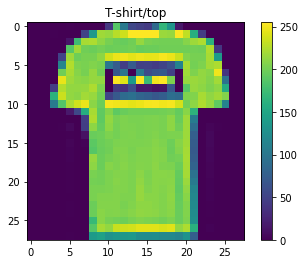

In [19]:
show_image(1)

Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [21]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28, 28)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation='softmax') #softmax is used on this layer to calculate a probabillity distribution for each class
    ]
)

###Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [46]:
model.compile(
    # optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'],
    optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'],
)

##Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [47]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2339 - accuracy: 0.9131
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2308 - accuracy: 0.9158
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2297 - accuracy: 0.9169
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2286 - accuracy: 0.9171
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2240 - accuracy: 0.9200
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2229 - accuracy: 0.9209
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2198 - accuracy: 0.9225
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2186 - accuracy: 0.9239
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2176 - accuracy: 0.9244
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.212

###Evaluate the Model

In [48]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4689 - accuracy: 0.8710
Test accuracy: 0.8709999918937683



##Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.



In [49]:
# Remember the images we passed were divided by 255 to scale them to size
## Images to be predicted must follow the pattern

predictions = model.predict(test_images)

In [50]:
def predict_item(value):
  # This is a set of probabilities of the first image
  predictions[value] 
  # This gives us the highest probability in the list
  predictions[value].max()
  # This gives us the index of the highest value in the list
  v = np.argmax(predictions[value])
  # Validate if our prediction is close to our Expected value
  print("Our model predicted {}, when the expected value was {}"
  .format(class_names[v], class_names[test_labels[value]]))

In [51]:
predict_item(99)

Our model predicted Pullover, when the expected value was Pullover


Pick a number: 99


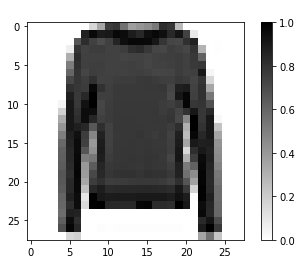

In [52]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)